In [3]:
#A00832272-Julian Lawrence Gil Soares

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Dataset: Abalone Liga al dataset: https://archive.ics.uci.edu/dataset/1/abalone


Este dataset es para un problema de regresión. El objetivo es determinar la edad de los abalone a través del número de anillos que encontramos en ellos.


Modelo: Para mi solución utilizo un simple modelo de regresión lineal, este modelo no cuenta con hiper parámetros que se puedan configurar, así que la manera en la que puedo jugar con los resultados es a través de usar features distintas para la predicción.


Datos:

Número de registros: 4177

Número de características: 9

* Sex

* Length

* Diameter

* Height

* Whole weight

* Shucked weight

* Viscera weight

* Shell weight

* Rings


Clase de salida: Rings


Para las métricas de desempeño estoy utilizando R^2 y MSE. El MSE calcula la diferencia entre los valores predecidos y los valores reales, el R^2 muestra la varianza que tienen los datos.

MSE: 6.98359599679207
MSE training: 7.064932738678533
MSE validation: 95.26463774928526
R^2: 0.35487662896130234
R^2 train: 0.3287483179470918


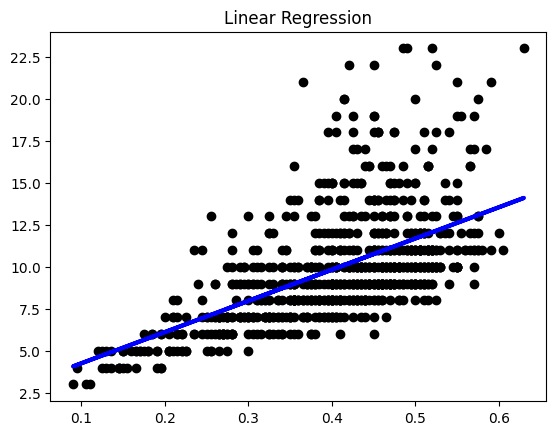

      Actual  Predicted
866        9  10.854998
1483       8  10.576414
599       16  10.669275
1702       9  11.505028
670       14   9.554939
2430      11   9.462077
1590       7   9.647800
949        6   9.369216
4026       7   7.604849
3668      10  11.040721
Variance: 3.545082158363125
MSE: 6.859520586128331
MSE training: 6.36167370802563
MSE validation: 104.36548248435763
R^2: 0.36633833826223705
R^2 train: 0.39556619501763235


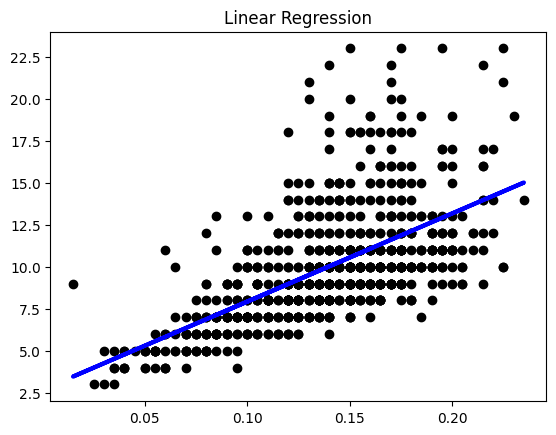

      Actual  Predicted
866        9  11.082988
1483       8  10.557970
599       16  12.920551
1702       9  11.608006
670       14  10.295461
2430      11  10.032951
1590       7   9.507933
949        6   8.720406
4026       7   7.407861
3668      10  10.295461
Variance: 4.180378170648712
MSE: 8.820565529613267
MSE training: 8.67728288132843
MSE validation: 94.05502927709766
R^2: 0.18518296712099003
R^2 train: 0.1755560958348077


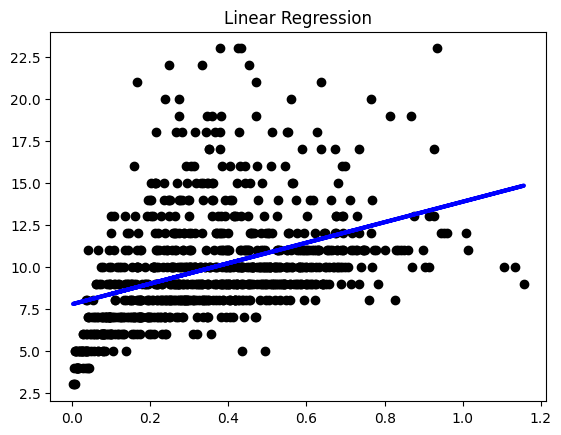

      Actual  Predicted
866        9  10.347682
1483       8  10.140175
599       16   9.639714
1702       9  11.064805
670       14   9.212492
2430      11   8.861560
1590       7   9.215544
949        6   9.734313
4026       7   8.306171
3668      10  10.417869
Variance: 1.7642560465268036
MEAN:  9.933684462532918


In [4]:
#import libraries and create dataframe
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt



columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

df = pd.read_csv('/content/drive/MyDrive/Stats/abalone.data', header=None, names=columns)

word_to_number = {
    'M':0,
    'F':1,
    'I':2
}

# cleaning data in Sex column
df['Sex'] = df['Sex'].map(word_to_number)

# assign features
feature1 = 'Diameter'
feature2 = 'Height'
feature3 = 'Shucked weight'

#print(df)

def graph(df,feature):

    X = df[[feature]]
    y = df['Rings']

    # Split data into training and a temporary set (80% training, 20% temp)
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Split the temporary set into validation and final test (50% validation, 50% final test)
    X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

    # Now you have X_train, y_train (for training), X_val, y_val (for validation), and X_test, y_test (for final testing)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    mse = mean_squared_error(y_test, y_pred)
    mseTrain = mean_squared_error(y_train, y_pred_train)
    mseVal = mean_squared_error(X_val, y_pred_val)
    r2 = r2_score(y_test, y_pred)
    r2Train = r2_score(y_train, y_pred_train)

    print("MSE:", mse)
    print("MSE training:", mseTrain)
    print("MSE validation:", mseVal)
    print("R^2:", r2)
    print("R^2 train:", r2Train)

    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title('Linear Regression')
    plt.show()

    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(comparison.head(10))

    variance = np.var(y_pred)

    print("Variance:", variance)

graph(df, feature1)
graph(df, feature2)
graph(df, feature3)

print("MEAN: ",df['Rings'].mean())


Total data points changed: 448
MSE: 8.430369853853804
MSE training: 8.062943340447578
MSE validation: 93.57126671988463
R^2: 0.22122805761968123
R^2 train: 0.2339255758314448


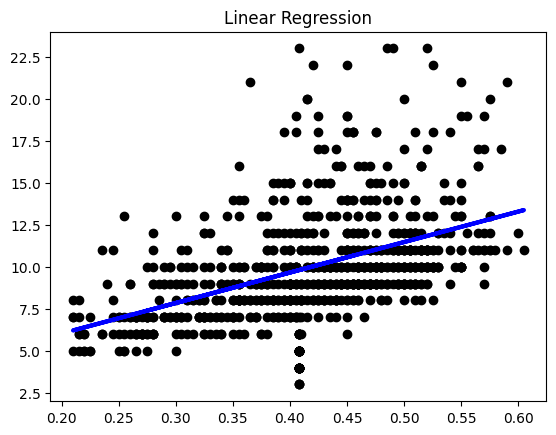

      Actual  Predicted
866        9  10.660347
1483       8  10.388301
599       16  10.478983
1702       9  11.295119
670       14   9.390802
2430      11   9.300120
1590       7   9.481484
949        6   9.209439
4026       7   7.486485
3668      10  10.841710
Variance: 2.2855593593389982
MSE: 8.002499093269833
MSE training: 7.155355493584082
MSE validation: 101.1399693353895
R^2: 0.26075345793831617
R^2 train: 0.32015709300960427


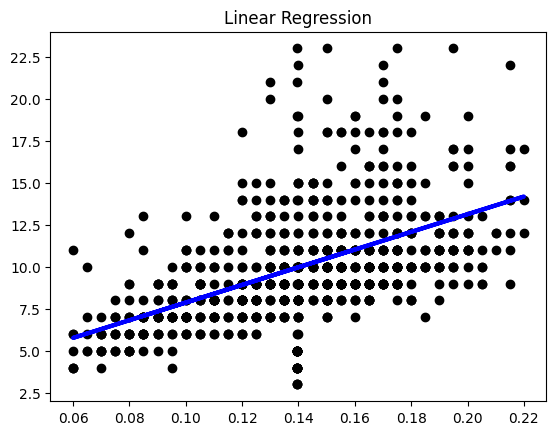

      Actual  Predicted
866        9  11.031547
1483       8  10.505544
599       16  12.872558
1702       9  11.557551
670       14  10.242543
2430      11   9.979541
1590       7   9.453538
949        6   8.664533
4026       7   7.349526
3668      10  10.242543
Variance: 3.206287632630589
MSE: 8.882133216329688
MSE training: 8.431226158025199
MSE validation: 94.93689509377262
R^2: 0.17949553136156227
R^2 train: 0.19893437776712997


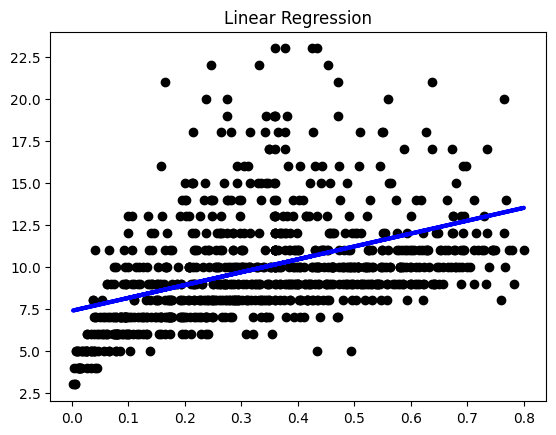

      Actual  Predicted
866        9  10.608623
1483       8  10.348169
599       16   9.720016
1702       9  11.508722
670       14   9.183787
2430      11   8.743313
1590       7   9.187617
949        6   9.838752
4026       7   8.046216
3668      10  10.696718
Variance: 2.1742967522023076


In [7]:
def normalizeData(df, features):
    df_cleaned = df.copy()

    columns_to_process = features
    points = 0

    for column in columns_to_process:
        z_scores = np.abs(stats.zscore(df[column]))
        threshold = 2
        mean_value = df[column].mean()

        changed = np.sum(z_scores > threshold)
        points += changed

        df_cleaned.loc[z_scores > threshold, column] = mean_value

    print(f"Total data points changed: {points}")
    df_cleaned['Rings'] = df['Rings']
    return(df_cleaned)

columns=['Diameter', 'Height', 'Shucked weight']
newDF= normalizeData(df, columns)

graph(newDF, feature1)
graph(newDF, feature2)
graph(newDF, feature3)

Antes de transformacion:

|       |   MSE     |   MSE training |   MSE validation |    R^2   |   R^2 train | Feature        | Actual | Predicted |
|-------|-----------|----------------|-----------------|----------|-------------|----------------|--------|-----------|
|   1   |  6.98     |     7.06       |      95.26      |   0.355  |   0.329     | Diameter       |        |           |
|       |           |                |                 |          |             |                |   9    | 10.855    |
|       |           |                |                 |          |             |                |   8    | 10.576    |
|       |           |                |                 |          |             |                |  16    | 10.669    |
|       |           |                |                 |          |             |                |   9    | 11.505    |
|       |           |                |                 |          |             |                |  14    |  9.555    |
|       |           |                |                 |          |             |                |  11    |  9.462    |
|       |           |                |                 |          |             |                |   7    |  9.648    |
|       |           |                |                 |          |             |                |   6    |  9.369    |
|       |           |                |                 |          |             |                |   7    |  7.605    |
|       |           |                |                 |          |             |                |  10    | 11.041    |
|       |           |                |                 |          |             |                |        |           |
|   2   |  6.86     |     6.36       |     104.37      |   0.366  |   0.396     | Height         |        |           |
|       |           |                |                 |          |             |                |   9    | 11.083    |
|       |           |                |                 |          |             |                |   8    | 10.558    |
|       |           |                |                 |          |             |                |  16    | 12.921    |
|       |           |                |                 |          |             |                |   9    | 11.608    |
|       |           |                |                 |          |             |                |  14    | 10.295    |
|       |           |                |                 |          |             |                |  11    | 10.033    |
|       |           |                |                 |          |             |                |   7    |  9.508    |
|       |           |                |                 |          |             |                |   6    |  8.720    |
|       |           |                |                 |          |             |                |   7    |  7.408    |
|       |           |                |                 |          |             |                |  10    | 10.295    |
|       |           |                |                 |          |             |                |        |           |
|   3   |  8.82     |     8.68       |      94.06      |   0.185  |   0.176     | Shucked weight |        |           |
|       |           |                |                 |          |             |                |   9    | 10.348    |
|       |           |                |                 |          |             |                |   8    | 10.140    |
|       |           |                |                 |          |             |                |  16    |  9.640    |
|       |           |                |                 |          |             |                |   9    | 11.065    |
|       |           |                |                 |          |             |                |  14    |  9.212    |
|       |           |                |                 |          |             |                |  11    |  8.862    |
|       |           |                |                 |          |             |                |   7    |  9.216    |
|       |           |                |                 |          |             |                |   6    |  9.734    |
|       |           |                |                 |          |             |                |   7    |  8.306    |
|       |           |                |                 |          |             |                |  10    | 10.418    |

Despues de transformacion:

Total data points changed: 448

|       |   Total data points changed |   MSE     |   MSE training |   MSE validation |    R^2   |   R^2 train | Feature        | Actual | Predicted |
|-------|-----------------------------|-----------|----------------|-----------------|----------|-------------|----------------|--------|-----------|
|   4   |  448                        |  8.43     |     8.06       |      93.57      |   0.221  |   0.234     | Diameter       |        |           |
|       |                             |           |                |                 |          |             |                |   9    | 10.660    |
|       |                             |           |                |                 |          |             |                |   8    | 10.388    |
|       |                             |           |                |                 |          |             |                |  16    | 10.479    |
|       |                             |           |                |                 |          |             |                |   9    | 11.295    |
|       |                             |           |                |                 |          |             |                |  14    |  9.391    |
|       |                             |           |                |                 |          |             |                |  11    |  9.300    |
|       |                             |           |                |                 |          |             |                |   7    |  9.481    |
|       |                             |           |                |                 |          |             |                |   6    |  9.209    |
|       |                             |           |                |                 |          |             |                |   7    |  7.486    |
|       |                             |           |                |                 |          |             |                |  10    | 10.842    |
|   5   |  448                        |  8.00     |     7.16       |     101.14      |   0.261  |   0.320     | Height         |        |           |
|       |                             |           |                |                 |          |             |                |   9    | 11.032    |
|       |                             |           |                |                 |          |             |                |   8    | 10.506    |
|       |                             |           |                |                 |          |             |                |  16    | 12.873    |
|       |                             |           |                |                 |          |             |                |   9    | 11.558    |
|       |                             |           |                |                 |          |             |                |  14    | 10.243    |
|       |                             |           |                |                 |          |             |                |  11    |  9.980    |
|       |                             |           |                |                 |          |             |                |   7    |  9.454    |
|       |                             |           |                |                 |          |             |                |   6    |  8.665    |
|       |                             |           |                |                 |          |             |                |   7    |  7.350    |
|       |                             |           |                |                 |          |             |                |  10    | 10.243    |
|   6   |  448                        |  8.88     |     8.43       |      94.94      |   0.179  |   0.199     | Shucked weight |        |           |
|       |                             |           |                |                 |          |             |                |   9    | 10.609    |
|       |                             |           |                |                 |          |             |                |   8    | 10.348    |
|       |                             |           |                |                 |          |             |                |  16    |  9.720    |
|       |                             |           |                |                 |          |             |                |   9    | 11.509    |
|       |                             |           |                |                 |          |             |                |  14    |  9.184    |
|       |                             |           |                |                 |          |             |                |  11    |  8.743    |
|       |                             |           |                |                 |          |             |                |   7    |  9.188    |
|       |                             |           |                |                 |          |             |                |   6    |  9.839    |
|       |                             |           |                |                 |          |             |                |   7    |  8.046    |
|       |                             |           |                |                 |          |             |                |  10    | 10.697    |



